In this notebook, the He data is used to determine an estimate of the stretch factor.  The main notebook contains comments with further explanation.  The same procedure is applied in this notebook.

In [13]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [14]:
path = 'example_data/'
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0)    

In [15]:
lamp_on  = []
lamp_off = []

sun_on  = []
sun_off = []

for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(21,24):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(24,27):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
    
    

In [16]:
lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [17]:
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

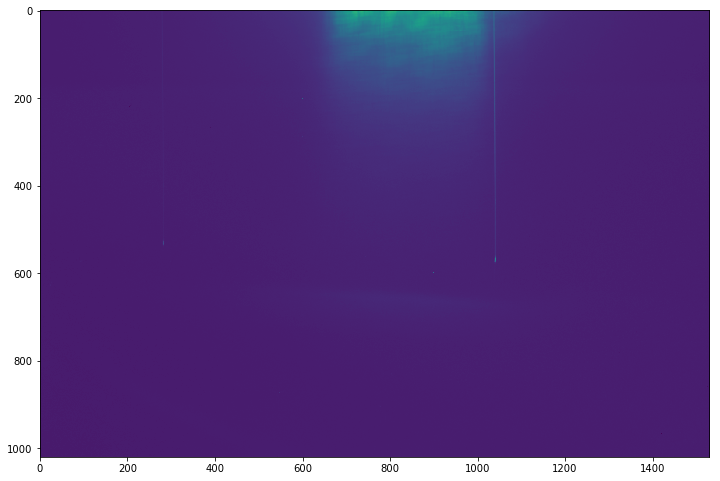

In [18]:
plt.imshow(avg_lamp)
plt.show()

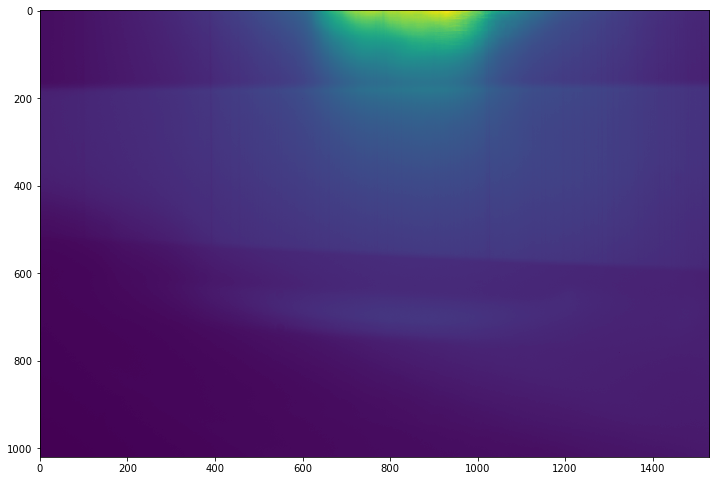

In [19]:
plt.imshow(avg_sun)
plt.show()

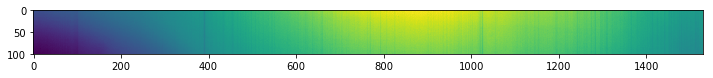

In [20]:
plt.imshow(avg_sun[400:500,:])

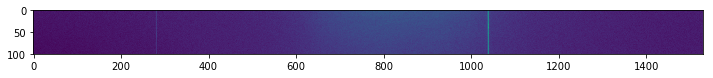

In [21]:
plt.imshow(avg_lamp[400:500,:])

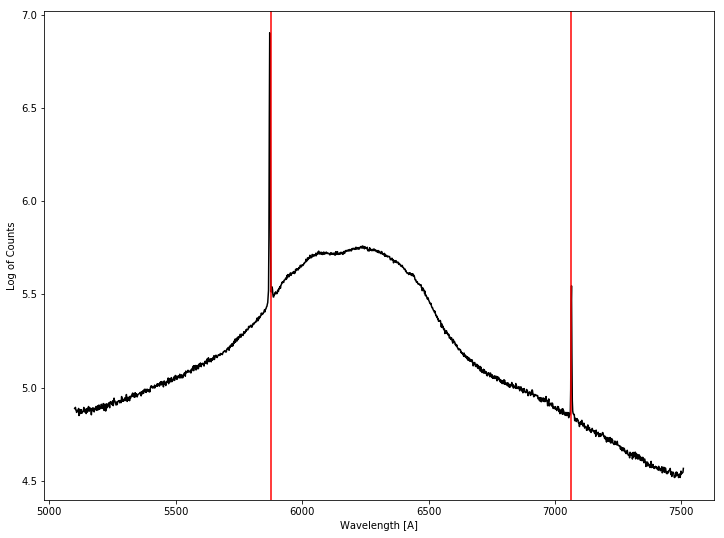

In [22]:
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0) 
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

He_lines = [5875.62,7065.19] #dominant He emission lines

stretch = 0.635
shift = 5100

plt.plot(np.flip((np.arange(len(lamp_good)))/stretch+shift,0), np.log(lamp_good), 'k-') 
for line in He_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [A]')
plt.ylabel('Log of Counts')
plt.show()
